# Tiempos de ejecucion en secuencial

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

In [87]:
datos = pd.read_csv("seq.txt")
datos.head()

,TAM_S,TIME_S
0,10,0.000007
1,50,0.000702
2,100,0.003615
3,200,0.028920
4,300,0.103045


In [88]:
datSeq = datos.groupby(["TAM_S"]).mean()
datSeq.reset_index(level=0,inplace=True)
datSeq

,TAM_S,TIME_S
0,10,0.000005
1,50,0.000675
2,100,0.004015
3,200,0.028736
4,300,0.098529
5,400,0.241374
6,500,0.500766
7,1000,7.876333


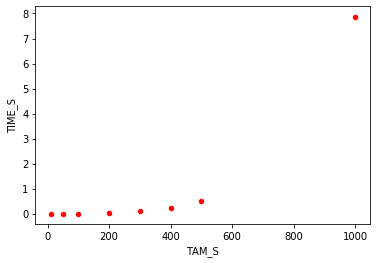

In [89]:
datSeq.plot(kind='scatter',x='TAM_S',y='TIME_S',color='red')
plt.show()

# Tiempos de ejecucion paralelo

In [90]:
datos_p = pd.read_csv("pthread.txt")
datos_p.head()

,TAM_P,TIME_P
0,10,0.000371
1,50,0.001296
2,100,0.003944
3,200,0.018586
4,300,0.054909


In [91]:
datParl = datos_p.groupby(["TAM_P"]).mean()
datParl.reset_index(level=0,inplace=True)
datParl

,TAM_P,TIME_P
0,10,0.000630
1,50,0.001879
2,100,0.003751
3,200,0.018815
4,300,0.057465
5,400,0.138173
6,500,0.281198
7,1000,3.958512


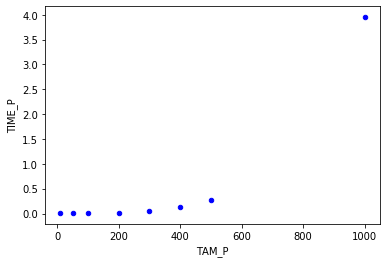

In [92]:
datParl.plot(kind='scatter',x='TAM_P',y='TIME_P',color='blue')
plt.show()

# Speedup entre paralelo y secuencial

In [93]:
datosMerge = pd.merge(left = datParl, left_index = False, left_on='TAM_P', 
                       right=datSeq, right_index=False,right_on = 'TAM_S')
datosMerge

,TAM_P,TIME_P,TAM_S,TIME_S
0,10,0.000630,10,0.000005
1,50,0.001879,50,0.000675
2,100,0.003751,100,0.004015
3,200,0.018815,200,0.028736
4,300,0.057465,300,0.098529
5,400,0.138173,400,0.241374
6,500,0.281198,500,0.500766
7,1000,3.958512,1000,7.876333


In [94]:
datosMerge['SPEEDUP'] = datosMerge["TIME_S"]/ datosMerge["TIME_P"]
datosMerge

,TAM_P,TIME_P,TAM_S,TIME_S,SPEEDUP
0,10,0.000630,10,0.000005,0.007621
1,50,0.001879,50,0.000675,0.359370
2,100,0.003751,100,0.004015,1.070515
3,200,0.018815,200,0.028736,1.527332
4,300,0.057465,300,0.098529,1.714598
5,400,0.138173,400,0.241374,1.746895
6,500,0.281198,500,0.500766,1.780828
7,1000,3.958512,1000,7.876333,1.989721


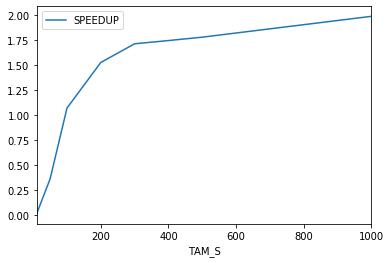

In [95]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_S',y='SPEEDUP', ax=ax)
plt.show()

# Tiempos de ejecucion por procesos

In [96]:
datos_o = pd.read_csv("openmp.txt")
datos_o.head()

,TAM_O,TIME_O
0,10,0.000344
1,50,0.004209
2,100,0.003993
3,200,0.021164
4,300,0.069353


In [97]:
datOpen = datos_o.groupby(["TAM_O"]).mean()
datOpen.reset_index(level=0,inplace=True)
datOpen

,TAM_O,TIME_O
0,10,0.000266
1,50,0.001650
2,100,0.005062
3,200,0.023105
4,300,0.079586
5,400,0.160833
6,500,0.298622
7,1000,3.818580


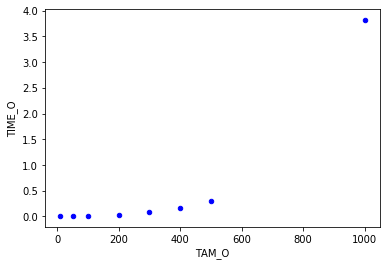

In [98]:
datOpen.plot(kind='scatter',x='TAM_O',y='TIME_O',color='blue')
plt.show()

## tiempos de ejecucion de Seq, Parl y Procesos

### TIME_S
es el tiempo de ejecucion del secuencial
### TIME_P
es el tiempo de ejecucion del paralelo
### TIME_O
es el tiempo de ejecucion de procesos

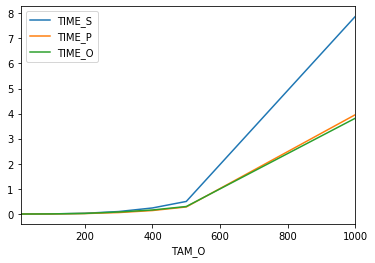

In [99]:
ax = plt.gca()
datSeq.plot(kind='line',x='TAM_S',y='TIME_S', ax=ax)
datParl.plot(kind='line',x='TAM_P',y='TIME_P', ax=ax)
datOpen.plot(kind='line',x='TAM_O',y='TIME_O', ax=ax)
plt.show()

# Speedup entre procesos y secuencial

In [100]:
datosMerge2 = pd.merge(left = datOpen, left_index = False, left_on='TAM_O', 
                       right=datSeq, right_index=False,right_on = 'TAM_S')
datosMerge2

,TAM_O,TIME_O,TAM_S,TIME_S
0,10,0.000266,10,0.000005
1,50,0.001650,50,0.000675
2,100,0.005062,100,0.004015
3,200,0.023105,200,0.028736
4,300,0.079586,300,0.098529
5,400,0.160833,400,0.241374
6,500,0.298622,500,0.500766
7,1000,3.818580,1000,7.876333


In [101]:
datosMerge2['SPEEDUP2'] = datosMerge2["TIME_S"]/ datosMerge2["TIME_O"]
datosMerge2

,TAM_O,TIME_O,TAM_S,TIME_S,SPEEDUP2
0,10,0.000266,10,0.000005,0.018025
1,50,0.001650,50,0.000675,0.409333
2,100,0.005062,100,0.004015,0.793279
3,200,0.023105,200,0.028736,1.243716
4,300,0.079586,300,0.098529,1.238015
5,400,0.160833,400,0.241374,1.500773
6,500,0.298622,500,0.500766,1.676919
7,1000,3.818580,1000,7.876333,2.062634


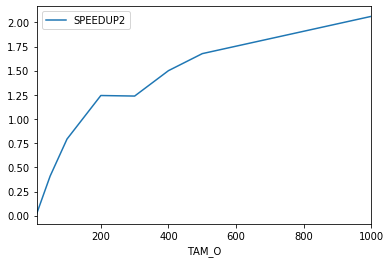

In [102]:
ax = plt.gca()
datosMerge2.plot(kind='line',x='TAM_O',y='SPEEDUP2', ax=ax)
plt.show()

# Speedup entre procesos y paralelo

In [103]:
datosMerge3 = pd.merge(left = datOpen, left_index = False, left_on='TAM_O', 
                       right=datParl, right_index=False,right_on = 'TAM_P')
datosMerge3

,TAM_O,TIME_O,TAM_P,TIME_P
0,10,0.000266,10,0.000630
1,50,0.001650,50,0.001879
2,100,0.005062,100,0.003751
3,200,0.023105,200,0.018815
4,300,0.079586,300,0.057465
5,400,0.160833,400,0.138173
6,500,0.298622,500,0.281198
7,1000,3.818580,1000,3.958512


In [104]:
datosMerge3['SPEEDUP3'] = datosMerge3["TIME_P"]/ datosMerge3["TIME_O"]
datosMerge3

,TAM_O,TIME_O,TAM_P,TIME_P,SPEEDUP3
0,10,0.000266,10,0.000630,2.365002
1,50,0.001650,50,0.001879,1.139030
2,100,0.005062,100,0.003751,0.741026
3,200,0.023105,200,0.018815,0.814306
4,300,0.079586,300,0.057465,0.722044
5,400,0.160833,400,0.138173,0.859109
6,500,0.298622,500,0.281198,0.941652
7,1000,3.818580,1000,3.958512,1.036645


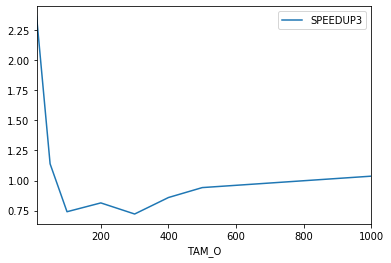

In [105]:
ax = plt.gca()
datosMerge3.plot(kind='line',x='TAM_O',y='SPEEDUP3', ax=ax)
plt.show()

## Grafica de los 3 SpeedUp anteriores

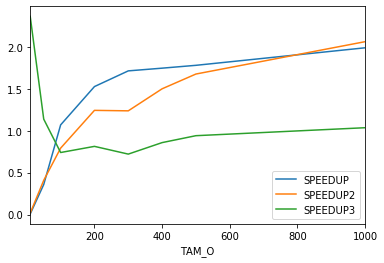

In [106]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_S',y='SPEEDUP', ax=ax)
datosMerge2.plot(kind='line',x='TAM_O',y='SPEEDUP2', ax=ax)
datosMerge3.plot(kind='line',x='TAM_O',y='SPEEDUP3', ax=ax)
plt.show()

# Conclusiones

- Es notorio que los tiempos de ejecución de los algoritmos en paralelo rebozan por mucho la ejecución secuencial. Para todos los datos en los documentos txt se obtiene mejores tiempos con los algoritmos paralelos desde el inicio de la toma de datos.

- Se evidencia que una maquina con mejor nivel de procesamiento refleja una resolucion a la cantidad de tareas mucho mas rapida que en una maquina con menos nivel de procesamiento.

- La diferencia en la aceleración entre estos algoritmos de paralelización parece que en algún momento tiende a un valor fijo. Se debe recordar que la maquina usada para la toma de los datos no es de uso especifico y esto puede introducir ruido en los tiempos de ejecución.